In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [2]:
from Tools.Dataloader import datasets_loader
train_loader, valid_loader, test_loader = datasets_loader()

## Hyper-parameters

In [9]:
hyperparams = {'num_epochs': 2,
               'lr0' :0.1, 
               'save_checkpoint': False
                  }
cuda_available = torch.cuda.is_available()


## Creating the model

In [10]:
from Classifier.VGG import VGG16

model = VGG16()

if cuda_available:
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=hyperparams['lr0'])
criterion = nn.CrossEntropyLoss()

In [11]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,792
              ReLU-2           [-1, 64, 64, 64]               0
   GaussianDropout-3           [-1, 64, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          36,928
              ReLU-5           [-1, 64, 64, 64]               0
         MaxPool2d-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
              ReLU-8          [-1, 128, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]         147,584
             ReLU-10          [-1, 128, 32, 32]               0
        MaxPool2d-11          [-1, 128, 16, 16]               0
           Conv2d-12          [-1, 256, 16, 16]         295,168
             ReLU-13          [-1, 256, 16, 16]               0
           Conv2d-14          [-1, 256,

## Training 

In [12]:
from Tools.Trainer import Trainer

trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)
nll_train, nll_valid, acc_tra in, acc_valid =  trainer.train_model()
print('Done...')

------ Epoch # 1 ------
 Iteration 40: TRAIN 0.6935
 Iteration 80: TRAIN 0.6936
 Iteration 120: TRAIN 0.6932
------ Epoch # 2 ------
 Iteration 160: TRAIN 0.6929
 Iteration 200: TRAIN 0.6932
 [Loss] TRAIN 0.6932 / VALID 0.6924
 [ACC] TRAIN 0.4991 / VALID 0.5175
 Iteration 240: TRAIN 0.6931
 Iteration 280: TRAIN 0.6928
Done...


## Visualization

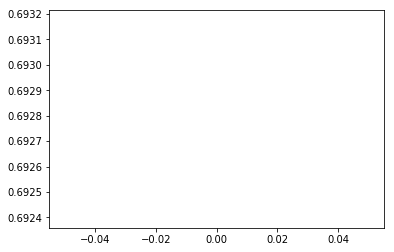

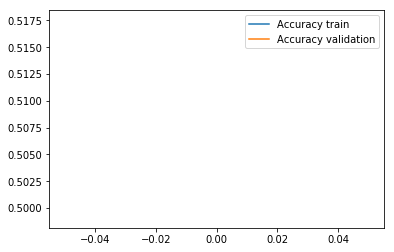

In [13]:
import Tools.Visualization as V

V.plots(nll_train, nll_valid, acc_train, acc_valid)

## Generate Submission

In [15]:
import Tools.Trainer as T
results = T.predict_test_set(test_loader)
T.generate_submission(results)

AttributeError: module 'Tools.Trainer' has no attribute 'predict_test_set'